In the <a href='https://www.datacamp.com/community/tutorials/the-importance-of-preprocessing-in-data-science-and-the-machine-learning-pipeline-i-centering-scaling-and-k-nearest-neighbours'> first article in this series</a>, I explored the role of preprocessing in machine learning (ML) classification tasks, with a deep dive into the k-Nearest Neighbours algorithm (k-NN) and the <a href='http://archive.ics.uci.edu/ml/datasets/Wine+Quality'> wine quality dataset</a>. There you saw that centering and scaling numerical data improved the performance of k-NN for a number of model performance measures (e.g. accuracy). You also saw that preprocessing does not occur in a vacuum and that its value can be judged only when viewed in the context of a prediction-oriented ML pipeline. However, we only saw the importance of preprocessing in the context of a single model, k-NN. In this case, our model performed significantly better but will this always be the case? Not necessarily! In this article, I'll explore the role of scaling and centering numerical data in another basic model, logistic regression. You may wish to refresh yourself by checking out the <a href='https://www.datacamp.com/community/tutorials/the-importance-of-preprocessing-in-data-science-and-the-machine-learning-pipeline-i-centering-scaling-and-k-nearest-neighbours'> previous article</a> and/or the glossary of terms at the bottom of this piece. Once again, we'll explore the <a href='http://archive.ics.uci.edu/ml/datasets/Wine+Quality'> wine quality dataset</a>. All examples herein will be in Python. If you're not familiar with Python, you can check out our DataCamp courses <a href = 'https://www.datacamp.com/'>here</a>. I will make use of the libraries <a href = 'http://pandas.pydata.org/'>pandas</a> for our dataframe needs and <a href = 'http://scikit-learn.org/stable/'>scikit-learn</a> for our machine learning needs.

I'll first provide a brief introduction to regression, which can be used to predict the value of a numerical variable as well as classes. I'll introduce linear regression, logistic regression and then use the latter to predict the quality of red wine. You'll then see whether centering and scaling helps our model in a regression setting.

### A brief introduction to regression with Python

#### Linear regression in Python


As mentioned above, regression is commonly used to predict the value of one numerical variable from that of another. For example, below we perform a **linear regression** on Boston housing data (an inbuilt dataset in scikit-learn): in this case, the independent variable (x-axis) is the number of rooms and the dependent variable (y-axis) is the price. 

How does such a regression work? In brief, the mechanics are as follows: we wish to fit a model $y = ax + b$ to the data $(x_i,y_i)$, that is, we want to find the optimal $a$ and $b$, given the data. In the ordinary least squares (OLS, by far the most common) formulation, there is an assumption that the error will occur in the dependent variable. For this reason, the optimal $a$ and $b$ are found by minimizing
$$SSE = \sum_i (y_i - (ax_i + b))^2$$
and this optimization is commonly achieved using an algorithm known as gradient descent. Here we perform a simple linear regression of the Boston housing data:

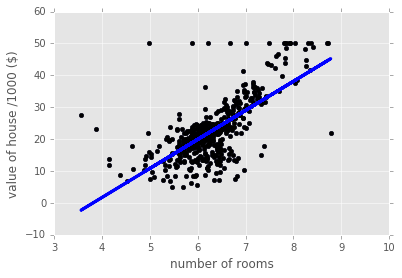

In [4]:
# Import necessary packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets
from sklearn import linear_model
import numpy as np
# Load data
boston = datasets.load_boston()
yb = boston.target.reshape(-1, 1)
Xb = boston['data'][:,5].reshape(-1, 1)
# Plot data
plt.scatter(Xb,yb)
plt.ylabel('value of house /1000 ($)')
plt.xlabel('number of rooms')
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit( Xb, yb)
# Plot outputs
plt.scatter(Xb, yb,  color='black')
plt.plot(Xb, regr.predict(Xb), color='blue',
         linewidth=3)
plt.show()

This regression captures the general increasing trend of the data but not much more. We have used only one predictor variable and could have used many more, in which case we would have $n$ coefficients $a_1,\ldots,a_n$ in the model, one for each predictor variable. It is worth noting that the magnitude of the variable $a_i$ tells us how strongly the corresponding variable is correlated with the target variable. 

#### Logistic regression in Python

Regression can also be used for classification problems. The first natural example of this is **logistic regression**. In binary classifation (two labels), we can think of the labels as 0 & 1. Once again denoting the predictor variable as $x$, the logistic regression model is given by the logistic function
$$F(x) = \frac{1}{1+e^{-(ax+b)}}.$$
This is a sigmoidal (S-shaped) curved and you can see an example below. For any given $x$, if $F(x) <0.5$, then the logistic model predicts y = 0 and, alternatively, if $F(X) > 0.5$ the model predicts $y = 1$. Once again, in case we have more than one predictor variable, we also have $n$ coefficients $a_1,\ldots,a_n$, one for each predictor variable. In this case, the magnitude of the variable $a_i$ tells us how strongly the corresponding variable effects the predictor variable.

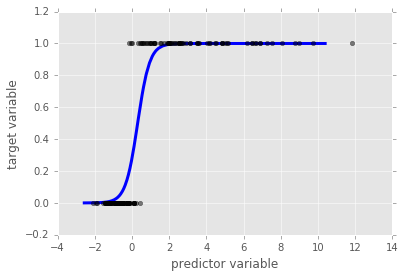

In [13]:
# Synthesize data
X1 = np.random.normal(size=150)
y1 = (X1 > 0).astype(np.float)
X1[X1 > 0] *= 4
X1 += .3 * np.random.normal(size=150)
X1= X1.reshape(-1, 1)
# Run the classifier
clf = linear_model.LogisticRegression()
clf.fit(X1, y1)
# Plot the result
plt.scatter(X1.ravel(), y1, color='black', zorder=20 , alpha = 0.5)
plt.plot(X1_ordered, clf.predict_proba(X1_ordered)[:,1], color='blue' , linewidth = 3)
plt.ylabel('target variable')
plt.xlabel('predictor variable')
plt.show()

### Logistic regression and data scaling: the wine data set

Now we've seen the mechanics of logistic regression, let's implement a logistic regression classifier on our delicious wine dataset. I'll import the data and plot the target variable (good/bad wine) as a refresher:

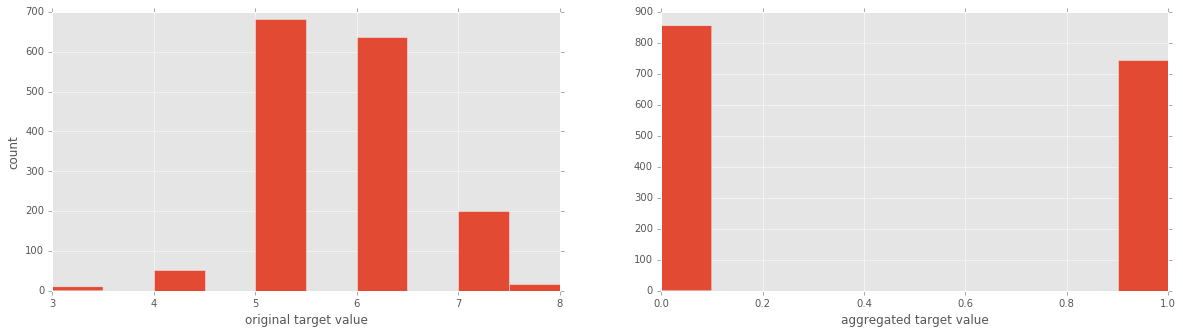

In [14]:
# Import necessary modules
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
# Load data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
X = df.drop('quality' , 1).values #drop target variable
y1 = df['quality'].values
y = y1 <= 5 # is the rating <= 5?
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

Let's now run our logistic regression and see how it performs!

In [16]:
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#initial logistic regression model
lr = linear_model.LogisticRegression()
# fit the model
lr = lr.fit(X_train, y_train)
print('Logistic Regression score for training set: %f' % lr.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, y_pred))

Logistic Regression score for training set: 0.752932
             precision    recall  f1-score   support

      False       0.78      0.74      0.76       179
       True       0.69      0.74      0.71       141

avg / total       0.74      0.74      0.74       320



Out of the box, this logistic regression performs better than K-NN (with or without scaling). Lets now scale our data and perform logistic regression:

In [18]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
lr_2 = lr.fit(Xs_train, y_train)
print('Scaled Logistic Regression score for test set: %f' % lr_2.score(Xs_test, y_test))
y_true, y_pred = y_test, lr_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

Scaled Logistic Regression score for test set: 0.740625
             precision    recall  f1-score   support

      False       0.79      0.74      0.76       179
       True       0.69      0.74      0.72       141

avg / total       0.74      0.74      0.74       320



This is very interesting! The performance of logistic regression did not improve with data scaling. Why not, particularly when we saw that k-Nearest Neigbours performance improved substantially with scaling? The reason is that, if there predictor variables with large ranges that do not effect the target variable, a regression algorithm will make the corresponding coefficients $a_i$ small so that they do not effect predictions so much. K-nearest neighbours does not have such an inbuilt strategy and so we very much needed to scale the data.

In the next article, I'll unpack the vastly different results of centering and scaling in k-NN and logistic regression by synthesizing a dataset, adding noise and seeing how centering and scaling alter the performance of both models as a function of noise strength.

___

In the interactive window below, you can play with the data yourself. You can scale the data by setting *sc = True*, if you desire. Then run the entire script to report the accuracy of the logistic regression model, along with a classification report.

___
### Glossary

**Supervised learning:** The task of inferring a *target variable* from *predictor variables*. For example, inferring the *target variable* 'presence of heart disease' from *predictor variables* such as 'age', 'sex', and 'smoker status'.


**Classification task:** A *supervised learning* task is a *classification task* if the target variable consists of categories (e.g. 'click' or 'not', 'malignant' or 'benign' tumour).

**Regression task:** A *supervised learning* task is a *regression task* if the target variable is a continuously varying variable (e.g. price of a house) or an ordered categorical variable such as 'quality rating of wine'.

**k-Nearest Neighbors:** An algorithm for *classification tasks*, in which a data point is assigned the label decided by a majority vote of its k nearest neighbors.

**Preprocessing:** Any number of operations data scientists will use to get their data into a form more appropriate for what they want to do with it. For example, before performing sentiment analysis of twitter data, you may want to strip out any html tags, white spaces, expand abbreviations and split the tweets into lists of the words they contain.

**Centering and Scaling:** These are both forms of preprocessing *numerical data*, that is, data consisting of numbers, as opposed to categories or strings, for example; *centering* a variable is subtracting the mean of the variable from each data point so that the new variable's mean is 0; *scaling* a variable is multiplying each data point by a constant in order to alter the range of the data. See the body of the article for the importance of these, along with examples.


___

*This article was generated from a Jupyter notebook. You can download the notebook <a href = 'https://github.com/hugobowne/machine_learning_techniques/blob/master/notes_on_ML/Logistic_regression_and_preprocessing.ipynb'>here</a>.*